In [2]:
import pandas as pd
# File paths
train_file = r"C:\Users\prits\Downloads\Data\clean_ghc_train.csv"
test_file = r'C:\Users\prits\Downloads\Data\clean_ghc_test.csv'

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame containing 'text' and 'label' columns

# Step 1: Drop rows with NaN in 'text' column
train_df = train_df.dropna(subset=['text'])

# Step 2: Split the data into X (features) and y (labels)
X = train_df['text']
y = train_df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

#Fit and transform X_train (text data) using TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Balance the training data 
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled= ros.fit_resample(X_train_tfidf, y_train)

# BEFORE HYPERTUNNING

# Logestic Regression

Accuracy: 0.8222732491389207
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      3800
           1       0.37      0.58      0.46       555

    accuracy                           0.82      4355
   macro avg       0.65      0.72      0.67      4355
weighted avg       0.86      0.82      0.84      4355



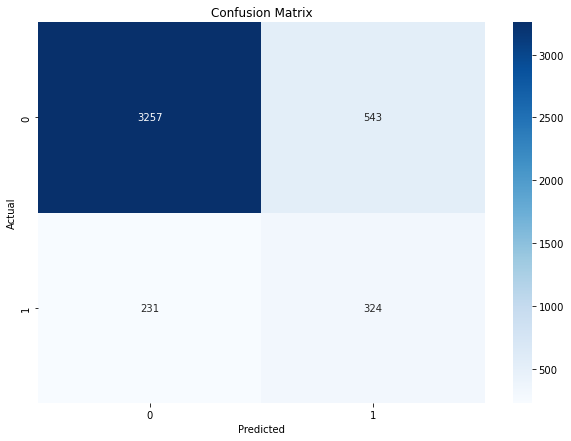

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_resampled,y_resampled)

# Make predictions
y_pred = gb_clf.predict(X_test_tfidf)

Accuracy: 0.8305396096440872
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3800
           1       0.39      0.56      0.46       555

    accuracy                           0.83      4355
   macro avg       0.66      0.71      0.68      4355
weighted avg       0.86      0.83      0.84      4355



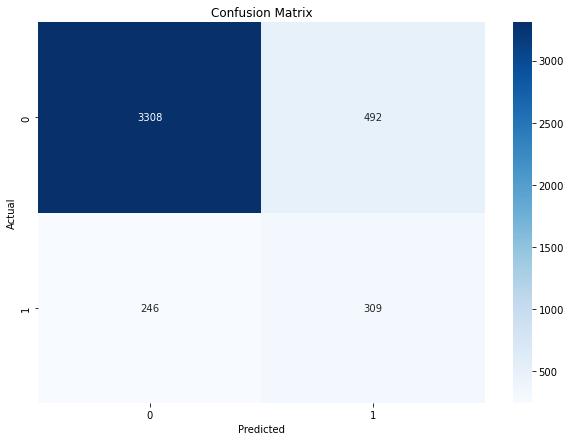

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [9]:
from sklearn.svm import SVC
svc=SVC(random_state=42,probability=True)
svc.fit(X_resampled, y_resampled)

SVC(probability=True, random_state=42)

Accuracy: 0.8874856486796785
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3800
           1       0.64      0.27      0.38       555

    accuracy                           0.89      4355
   macro avg       0.77      0.62      0.66      4355
weighted avg       0.87      0.89      0.87      4355



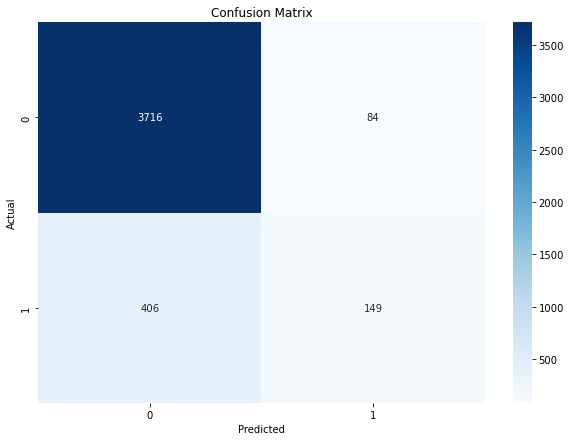

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=svc.predict(X_test_tfidf)
from sklearn.metrics import confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
# Define the Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

Accuracy: 0.8755453501722158
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3800
           1       0.88      0.03      0.05       555

    accuracy                           0.88      4355
   macro avg       0.88      0.51      0.49      4355
weighted avg       0.88      0.88      0.82      4355



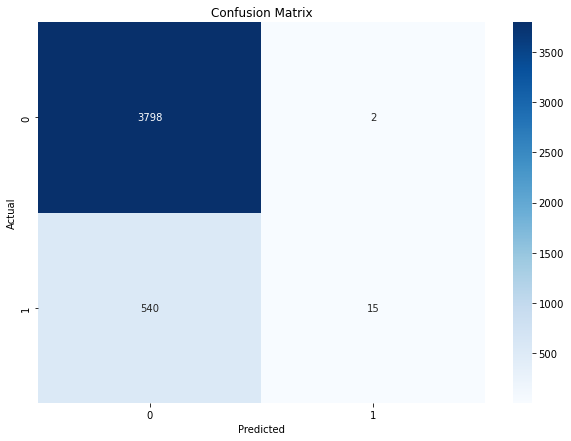

In [13]:
# Predict on the test set
y_pred = nb.predict(X_test_tfidf)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AFTER HYPERTUNNING

# LOGESTIC REGRESSION

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.9160498057830665
Accuracy: 0.8057405281285879
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      3800
           1       0.32      0.48      0.39       555

    accuracy                           0.81      4355
   macro avg       0.62      0.67      0.64      4355
weighted avg       0.84      0.81      0.82      4355



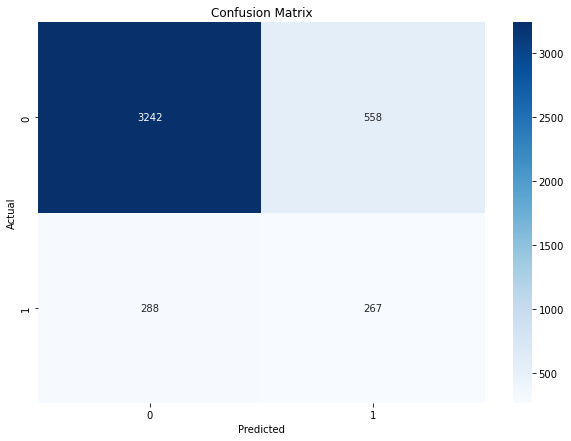

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have preprocessed your data and have X_resampled, y_resampled, X_test_tfidf, and y_test ready

# Define a smaller parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Solvers that handle L1 and L2 regularization
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize the GridSearchCV object with fewer cross-validation folds
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit the model to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# GRADIENT BOOSTING

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best F1 Score:  0.9009424949264074
Accuracy: 0.8445464982778416
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3800
           1       0.41      0.50      0.45       555

    accuracy                           0.84      4355
   macro avg       0.67      0.70      0.68      4355
weighted avg       0.86      0.84      0.85      4355



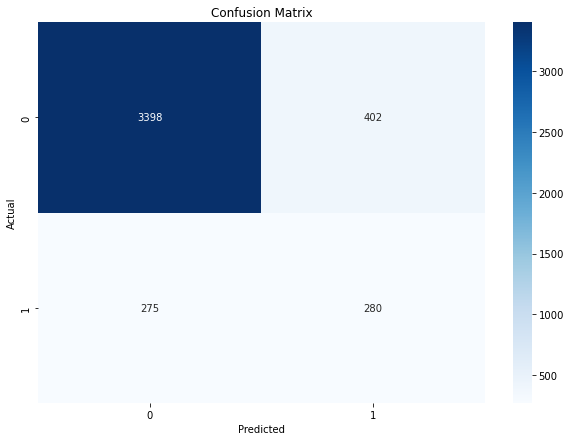

In [20]:
# Define the model
gb = GradientBoostingClassifier()


# Define the parameter grid
param_grid = {
        'n_estimators': [100],
        'learning_rate': [0.1, 0.5],
        'max_depth': [3, 5]
    }

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

# Predict using the best estimator
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.9825053331314176
Accuracy: 0.886337543053961
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3800
           1       0.67      0.21      0.32       555

    accuracy                           0.89      4355
   macro avg       0.78      0.60      0.63      4355
weighted avg       0.87      0.89      0.86      4355



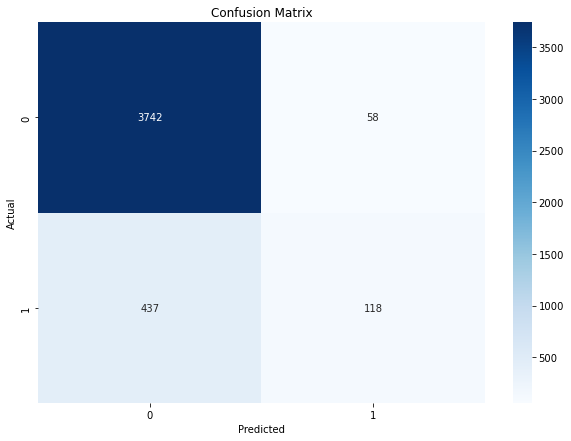

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  Define a smaller parameter grid
param_grid = {
    'C': [0.1, 1, 10],      # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf']       # Kernel type (using 'rbf' for this example)
}

#  Initialize the GridSearchCV object with fewer cross-validation folds
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='f1', n_jobs=-1)

#  Fit the model to the resampled training data
grid_search.fit(X_resampled, y_resampled)

#  Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', grid_search.best_score_)

#  Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Naive Bayes

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Step 1: Define a smaller parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0]
}

# Step 2: Initialize the GridSearchCV object with fewer cross-validation folds
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3, scoring='f1', n_jobs=-1)

# Step 3: Fit the model to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Step 4: Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', grid_search.best_score_)

# Step 5: Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Step 6: Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Best Parameters: {'alpha': 0.01}
Best F1 Score: 0.8268399537038161
Accuracy: 0.7540757749712974
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      3800
           1       0.28      0.57      0.37       555

    accuracy                           0.75      4355
   macro avg       0.60      0.68      0.61      4355
weighted avg       0.84      0.75      0.79      4355

Confusion Matrix:
 [[2966  834]
 [ 237  318]]
